In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [31]:
## load the spam data from the csv file
D = pd.read_csv('spam.csv')

In [32]:
nam = D.columns
nam


Index(['Unnamed: 0', 'make', 'address', 'all', 'num3d', 'our', 'over',
       'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people',
       'report', 'addresses', 'free', 'business', 'email', 'you', 'credit',
       'your', 'font', 'num000', 'money', 'hp', 'hpl', 'george', 'num650',
       'lab', 'labs', 'telnet', 'num857', 'data', 'num415', 'num85',
       'technology', 'num1999', 'parts', 'pm', 'direct', 'cs', 'meeting',
       'original', 'project', 're', 'edu', 'table', 'conference',
       'charSemicolon', 'charRoundbracket', 'charSquarebracket',
       'charExclamation', 'charDollar', 'charHash', 'capitalAve',
       'capitalLong', 'capitalTotal', 'type'],
      dtype='object')

In [33]:
## data cleaning
D.pop(nam[0])

0          1
1          2
2          3
3          4
4          5
        ... 
4596    4597
4597    4598
4598    4599
4599    4600
4600    4601
Name: Unnamed: 0, Length: 4601, dtype: int64

In [34]:
target = D.pop('type')
target

0          spam
1          spam
2          spam
3          spam
4          spam
         ...   
4596    nonspam
4597    nonspam
4598    nonspam
4599    nonspam
4600    nonspam
Name: type, Length: 4601, dtype: object

In [35]:
## transform the categorical data into numerica type
target = pd.Series(np.array(target == 'spam').astype(int))

In [36]:
target

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Length: 4601, dtype: int64

In [37]:
np.array(target == 'spam').astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
### Data normalization process 
normalized_D = D.apply(lambda x: (x - np.mean(x))/np.std(x), axis = 0)

In [39]:
### split data into two parts with 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(normalized_D, target, 
                                                    test_size = 0.2)

In [40]:
x_test

,make,address,all,num3d,our,over,remove,internet,order,mail,...,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
2731,-0.342434,-0.165072,-0.556761,-0.0469,0.665898,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,-0.329912,-0.308355,-0.103048,-0.091140,-0.231810,-0.239640
1189,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,1.476158,-0.308355,-0.103048,-0.035319,-0.118914,-0.279225
1483,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,1.011459,-0.308355,-0.103048,-0.118626,-0.242073,-0.401281
3738,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,0.489780,0.295842,0.310965,-0.323302,-0.371364,...,-0.111546,0.141409,-0.514307,-0.155198,-0.329912,-0.308355,-0.103048,-0.063277,0.112009,-0.125831
3994,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,-0.329912,-0.308355,-0.103048,-0.114938,-0.236941,-0.439217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,0.214351,-0.165072,0.137563,-0.0469,0.323860,-0.350266,-0.291794,0.610196,-0.323302,-0.371364,...,-0.111546,0.133194,0.014684,-0.155198,-0.329912,-0.308355,-0.103048,-0.085971,0.142799,-0.064804
734,-0.342434,-0.165072,0.851723,-0.0469,0.859224,0.270638,0.142546,-0.262562,-0.323302,1.552055,...,-0.111546,-0.158453,-0.514307,-0.155198,0.010948,0.570211,1.844328,0.105008,0.029903,1.008954
1944,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,-0.329912,-0.308355,-0.103048,-0.116356,-0.252336,-0.457360
2758,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,0.107165,0.612751,-0.226918,-0.308355,0.288290,-0.091046,-0.190757,-0.254484


In [41]:
### Split the training set further into two parts, 60% as training set, 40% as validation set.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.4)

In [42]:
x_val

,make,address,all,num3d,our,over,remove,internet,order,mail,...,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
4241,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,-0.329912,-0.308355,-0.103048,-0.132116,-0.262599,-0.457360
3629,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,-0.329912,-0.308355,-0.103048,-0.132116,-0.262599,-0.459010
476,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,3.897738,-0.308355,-0.103048,-0.079604,-0.211283,-0.427671
2161,-0.342434,-0.165072,0.812048,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,-0.329912,-0.308355,-0.103048,-0.123669,-0.247205,-0.381488
413,0.116095,-0.056581,0.018536,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,3.338050,0.078467,...,-0.111546,-0.158453,0.240338,-0.155198,-0.142316,0.313962,0.134550,-0.078375,0.106877,0.139722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,-0.342434,-0.165072,-0.040978,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.010576,-0.111090,-0.155198,-0.329912,-0.161927,-0.103048,-0.112196,-0.211283,0.039108
2098,-0.342434,-0.165072,-0.160005,-0.0469,0.427959,0.380209,-0.291794,-0.262562,0.035654,-0.371364,...,-0.111546,-0.158453,-0.333044,-0.155198,-0.329912,-0.308355,-0.103048,-0.127924,-0.216415,-0.033465
4411,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,0.776482,...,-0.111546,-0.158453,-0.055601,-0.155198,-0.329912,-0.308355,-0.103048,-0.101668,-0.190757,-0.369942
4523,1.033152,-0.165072,0.276427,-0.0469,-0.152019,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,0.005855,-0.366337,-0.155198,-0.329912,-0.308355,-0.103048,-0.100596,-0.252336,-0.444165


In [43]:
dataset = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))

dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))

In [44]:
## model with one layer and 10 neurons
def get_compiled_model10():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer= 'sgd',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [45]:
## model with one layer and 100 neurons
def get_compiled_model100():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='sgd',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [46]:
## model with one layer and 1000 neurons
def get_compiled_model1000():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='sgd',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [47]:
train_dataset = dataset.shuffle(len(x_train)).batch(32)
val_dataset = dataset_val.shuffle(len(x_val)).batch(32)

In [48]:
## Compile the model.
model10 = get_compiled_model10()

In [49]:
## Training the model
train_history = model10.fit(train_dataset, epochs = 100, validation_data= val_dataset )


Train for 69 steps, validate for 46 steps
Epoch 1/100
69/69 [==============================] - 0s 6ms/step - loss: 0.7739 - accuracy: 0.6132 - val_loss: 0.6104 - val_accuracy: 0.6970
Epoch 2/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7242 - val_loss: 0.5157 - val_accuracy: 0.7391
Epoch 3/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7586 - val_loss: 0.4653 - val_accuracy: 0.7602
Epoch 4/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7790 - val_loss: 0.4298 - val_accuracy: 0.7785
Epoch 5/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8025 - val_loss: 0.4026 - val_accuracy: 0.7908
Epoch 6/100
69/69 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8184 - val_loss: 0.3817 - val_accuracy: 0.8037
Epoch 7/100
69/69 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8311 - val_loss: 0

69/69 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9312 - val_loss: 0.2276 - val_accuracy: 0.9219
Epoch 59/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9330 - val_loss: 0.2270 - val_accuracy: 0.9212
Epoch 60/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9330 - val_loss: 0.2265 - val_accuracy: 0.9219
Epoch 61/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9330 - val_loss: 0.2260 - val_accuracy: 0.9219
Epoch 62/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9339 - val_loss: 0.2255 - val_accuracy: 0.9219
Epoch 63/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9339 - val_loss: 0.2250 - val_accuracy: 0.9232
Epoch 64/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.9339 - val_loss: 0.2246 - val_accuracy: 0.9232
Epoch 65/100
69/69 

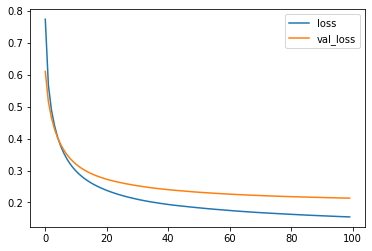

In [50]:
### 10 neurons case
loss = train_history.history['loss']
val_loss10 = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss10)
plt.legend(['loss', 'val_loss'])
plt.show()

Train for 69 steps, validate for 46 steps
Epoch 1/100
69/69 [==============================] - 0s 6ms/step - loss: 0.6204 - accuracy: 0.6544 - val_loss: 0.5274 - val_accuracy: 0.7072
Epoch 2/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7477 - val_loss: 0.4444 - val_accuracy: 0.7656
Epoch 3/100
69/69 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.7953 - val_loss: 0.3982 - val_accuracy: 0.7935
Epoch 4/100
69/69 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8225 - val_loss: 0.3678 - val_accuracy: 0.8118
Epoch 5/100
69/69 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8428 - val_loss: 0.3464 - val_accuracy: 0.8227
Epoch 6/100
69/69 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8514 - val_loss: 0.3308 - val_accuracy: 0.8308
Epoch 7/100
69/69 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.8614 - val_loss: 0

69/69 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9366 - val_loss: 0.2212 - val_accuracy: 0.9226
Epoch 59/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9370 - val_loss: 0.2206 - val_accuracy: 0.9232
Epoch 60/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9389 - val_loss: 0.2199 - val_accuracy: 0.9226
Epoch 61/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9375 - val_loss: 0.2193 - val_accuracy: 0.9232
Epoch 62/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9380 - val_loss: 0.2188 - val_accuracy: 0.9239
Epoch 63/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1548 - accuracy: 0.9384 - val_loss: 0.2182 - val_accuracy: 0.9239
Epoch 64/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9398 - val_loss: 0.2177 - val_accuracy: 0.9246
Epoch 65/100
69/69 

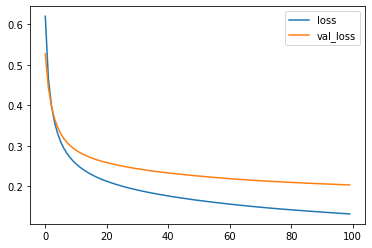

In [55]:
#### 100 neurons case
model100 = get_compiled_model100()
train_history = model100.fit(train_dataset, epochs = 100, validation_data= val_dataset )
loss = train_history.history['loss']
val_loss100 = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss100)
plt.legend(['loss', 'val_loss'])
plt.show()

Train for 69 steps, validate for 46 steps
Epoch 1/100
69/69 [==============================] - 0s 7ms/step - loss: 0.5775 - accuracy: 0.6667 - val_loss: 0.5026 - val_accuracy: 0.7038
Epoch 2/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.7736 - val_loss: 0.4215 - val_accuracy: 0.7785
Epoch 3/100
69/69 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8184 - val_loss: 0.3776 - val_accuracy: 0.8030
Epoch 4/100
69/69 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8401 - val_loss: 0.3504 - val_accuracy: 0.8166
Epoch 5/100
69/69 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8542 - val_loss: 0.3319 - val_accuracy: 0.8261
Epoch 6/100
69/69 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8596 - val_loss: 0.3181 - val_accuracy: 0.8404
Epoch 7/100
69/69 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8700 - val_loss: 0

69/69 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9398 - val_loss: 0.2188 - val_accuracy: 0.9219
Epoch 59/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9402 - val_loss: 0.2182 - val_accuracy: 0.9219
Epoch 60/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9402 - val_loss: 0.2177 - val_accuracy: 0.9219
Epoch 61/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9407 - val_loss: 0.2172 - val_accuracy: 0.9226
Epoch 62/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9407 - val_loss: 0.2167 - val_accuracy: 0.9226
Epoch 63/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9411 - val_loss: 0.2161 - val_accuracy: 0.9219
Epoch 64/100
69/69 [==============================] - 0s 2ms/step - loss: 0.1527 - accuracy: 0.9407 - val_loss: 0.2157 - val_accuracy: 0.9232
Epoch 65/100
69/69 

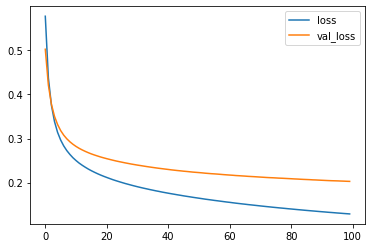

In [56]:
#### 1000 neurons case
model1000 = get_compiled_model1000()
train_history = model1000.fit(train_dataset, epochs = 100, validation_data= val_dataset )
loss = train_history.history['loss']
val_loss1000 = train_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss1000)
plt.legend(['loss', 'val_loss'])
plt.show()

In [58]:
### The best epoch with minimized validation 
print(np.argmin(val_loss10))
print(np.argmin(val_loss100))
print(np.argmin(val_loss1000))

99
99
99


In [59]:
### Prediction Accuracy on test data set
model10.evaluate(x_test,  y_test, verbose=2)

921/921 - 0s - loss: 0.1773 - accuracy: 0.9251


[0.17727952752258308, 0.92508143]

In [60]:
model100.evaluate(x_test,  y_test, verbose=2)

921/921 - 0s - loss: 0.1592 - accuracy: 0.9338


[0.15918787206390653, 0.9337676]

In [61]:
model1000.evaluate(x_test,  y_test, verbose=2)

921/921 - 0s - loss: 0.1629 - accuracy: 0.9273


[0.16294475457955648, 0.927253]